In [1]:
import numpy as np 
import pandas as pd
from matplotlib  import pyplot as plt
%matplotlib inline
import seaborn as sns
#matplotlib.rcParams['figure.figsize']= (20,10)

In [2]:
df1= pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#df1.groupby('area_type')['area_type'].agg('count')

In [6]:
df1.area_type.value_counts(ascending=True)

Carpet  Area              87
Plot  Area              2025
Built-up  Area          2418
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df1.location.value_counts()

Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Hanuman Nagar             1
Off Bannergatta Road      1
Bhattarahalli             1
CR Layout                 1
Kanakapura Main Road      1
Name: location, Length: 1305, dtype: int64

In [9]:
df2=df1.drop(['area_type', 'availability','society'],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df2.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
df2.balcony.mode()

0    2.0
dtype: float64

In [13]:
df2.balcony.mode()[0]

2.0

In [14]:
df2['balcony']=df2['balcony'].fillna(value=df2.balcony.mode()[0])

In [15]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [16]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
df3= df2.dropna()

In [18]:
df3.shape

(13246, 6)

In [19]:
df1.shape

(13320, 9)

In [20]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [21]:
#df3['size'].value_counts()

In [22]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df3['BHK']=df3['size'].apply(lambda x:int( x.split(' ')[0]))

<ipython-input-23-98b2d19b8e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x:int( x.split(' ')[0]))


In [24]:
df3.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     13246 non-null  float64
 5   price       13246 non-null  float64
 6   BHK         13246 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 827.9+ KB


In [26]:
df3.BHK.value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
16       1
27       1
43       1
18       1
12       1
13       1
14       1
19       1
Name: BHK, dtype: int64

In [27]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [28]:
df3.total_sqft.value_counts()

1200     843
1100     221
1500     204
2400     195
600      180
        ... 
2162       1
1429       1
1561       1
1629       1
52272      1
Name: total_sqft, Length: 2067, dtype: int64

In [29]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
# checking if all the value of total_sqft in float  are not
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True

In [31]:
df3[df3['total_sqft'].apply(is_float)] # with out this '~' it will return ony true values only

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [32]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [33]:
# taking the average of ,all the value of the total_sqft with are in range 

In [34]:
def convert_range_sqft_to_avg(x):
    tok=x.split('-')
    if len(tok)==2:
        return(float(tok[0])+float(tok[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
convert_range_sqft_to_avg('152')

152.0

In [36]:
convert_range_sqft_to_avg('1000Sq. Meter')

In [37]:
convert_range_sqft_to_avg('3090 - 5002')

4046.0

In [38]:
(3090+5002)*.5

4046.0

In [39]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [40]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_range_sqft_to_avg)
df4.head(20)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,2.0,370.00,6


In [41]:
df4['total_sqft'].value_counts()

1200.0    843
1100.0    221
1500.0    204
2400.0    195
600.0     180
         ... 
9000.0      1
1915.0      1
4772.0      1
1753.0      1
499.0       1
Name: total_sqft, Length: 1972, dtype: int64

In [42]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [43]:
df4.shape

(13246, 7)

In [44]:
df4.loc[775]

location      Basavanagara
size                 1 BHK
total_sqft             NaN
bath                   2.0
balcony                1.0
price                 93.0
BHK                      1
Name: 775, dtype: object

In [45]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [46]:
0.5*(2100+2850)

2475.0

In [47]:
df4.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [48]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [49]:
df4.total_sqft.mean()

1555.3027829545451

In [50]:
df4=df4.fillna(value=df4.total_sqft.mean(),axis=1)

In [51]:
df4.shape

(13246, 7)

In [52]:
df4.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [53]:
#doing some feature engineering

In [54]:
df5=df4.copy()

In [55]:
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [56]:
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [57]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [58]:
len(df5.location.unique())

1304

In [59]:
df5.location = df5.location.apply(lambda x:x.strip()) 
# this is to seperate the space , if there is any space in the end of the word

In [60]:
df5.location.value_counts(ascending=False).head(30)

Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
Hoodi                        88
KR Puram                     88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Harlur                       79
Kasavanhalli                 79
Banashankari                 74
Hormavu                      74
Ramamurthy Nagar             73
Kengeri                      73
Name: location, dtype: int64

In [61]:
location_status=df5.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_status

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [62]:
len(location_status[location_status<=10])

1052

In [63]:
location_status_less_than_10=(location_status[location_status<=10])

In [64]:
location_status_less_than_10.head(-20)

location
Basapura                   10
1st Block Koramangala      10
Gunjur Palya               10
Kalkere                    10
Sector 1 HSR Layout        10
                           ..
Laxminarayana Layout        1
M C Layout                  1
M.G Road                    1
Kenchanehalli R R Nagar     1
Kathriguppe IV Phase        1
Name: location, Length: 1032, dtype: int64

In [65]:
len(df5.location.unique())

1293

In [66]:
#df5.location.map({df5[df5.location<=10]:'other'})

In [67]:
df5.location= df5.location.apply(lambda x: 'other' if x in location_status_less_than_10 else x )
df5.location.value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Narayanapura            11
LB Shastri Nagar        11
Pattandur Agrahara      11
HAL 2nd Stage           11
Nehru Nagar             11
Name: location, Length: 242, dtype: int64

In [68]:
len(df5.location.value_counts())

242

In [69]:
df5.location.value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Narayanapura            11
LB Shastri Nagar        11
Pattandur Agrahara      11
HAL 2nd Stage           11
Nehru Nagar             11
Name: location, Length: 242, dtype: int64

In [70]:
df5.head(10)

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [71]:
# detecting outliers and anomalies 

In [72]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [73]:
df5[df5.total_sqft/df5.BHK<300].shape

(748, 8)

In [74]:
df5.shape

(13246, 8)

In [75]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [76]:
df6.shape

(12498, 8)

In [77]:
df6.price_per_sqft.describe()

count     12498.000000
mean       6316.823847
std        4184.039046
min         267.829813
25%        4210.526316
50%        5294.292025
75%        6932.530120
max      176470.588235
Name: price_per_sqft, dtype: float64

In [78]:
df6.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [79]:
df7=df6.copy()
df7.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [80]:
#for i , j in df7.groupby('location'):
 #   print(i)
  #  print(j)

In [81]:
def remove_outliers(df):
    output_df=pd.DataFrame()
    for loc, subdf in df.groupby('location'):
        mean= np.mean(subdf.price_per_sqft)
        std= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(mean-std))&(subdf.price_per_sqft<=(mean+std))] 
        output_df=pd.concat([output_df,reduced_df],ignore_index=True)
    return output_df
df7=remove_outliers(df7)
df7.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [82]:
df7.shape

(10286, 8)

In [83]:
df7.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10286.000000,10286.000000,10286.000000,10286.000000,10286.000000,10286.000000
mean,1504.310001,2.474723,1.603636,91.115173,2.572623,5664.889697
std,875.789957,0.981844,0.788655,86.160475,0.896992,2277.420413
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1108.250000,2.000000,1.000000,49.000000,2.000000,4243.008921
50%,1285.000000,2.000000,2.000000,67.000000,2.000000,5175.792088
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6437.347618
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


### checking if the price of 3 BHK is more than  2 BHK or not 

In [84]:
def plot_scatter_chat(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.figure(figsize=(10,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color= 'blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color= 'green',label='3 BHK',s=50)
    plt.xlabel('Area in square feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

In [85]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

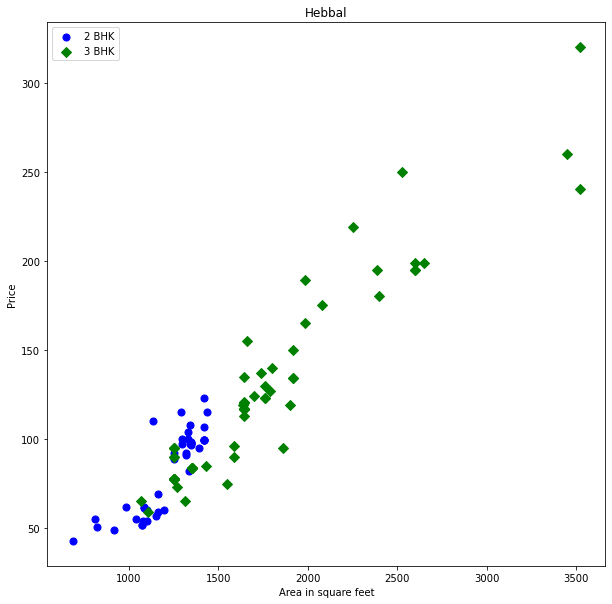

In [86]:
plot_scatter_chat(df7,'Hebbal')

In [87]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location ,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'SD': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk ,bhk_df in location_df.groupby('BHK'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [88]:
df8=remove_bhk_outlier(df7)
df8.shape

(7341, 8)

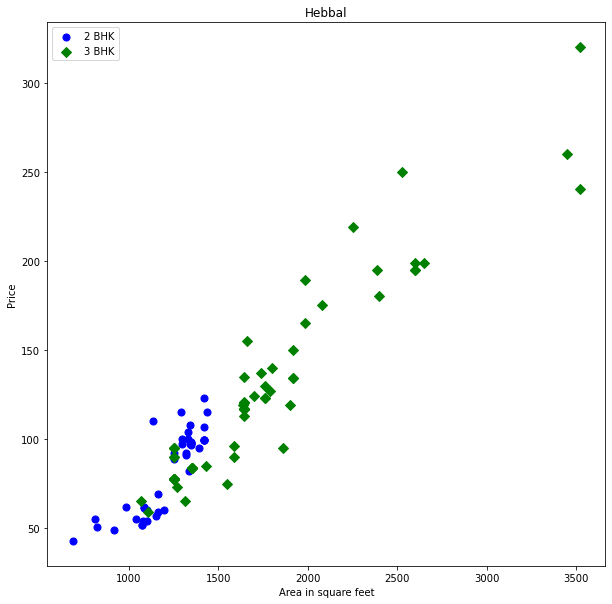

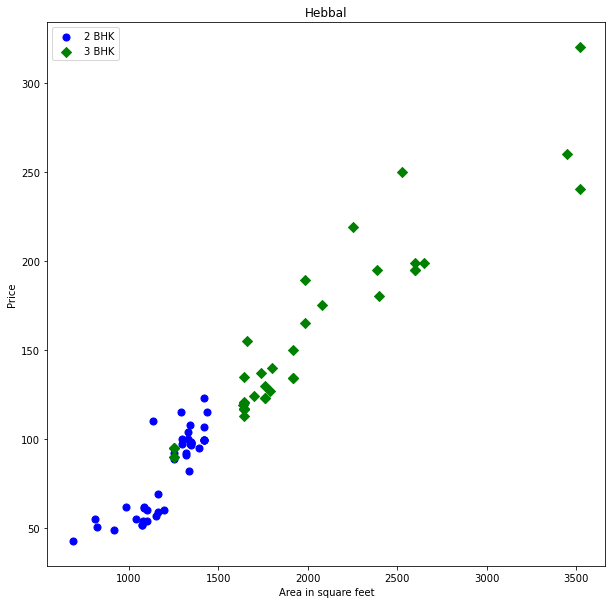

In [89]:
plot_scatter_chat(df7,'Hebbal')
plt.show()
plot_scatter_chat(df8,'Hebbal')

Text(0, 0.5, 'count')

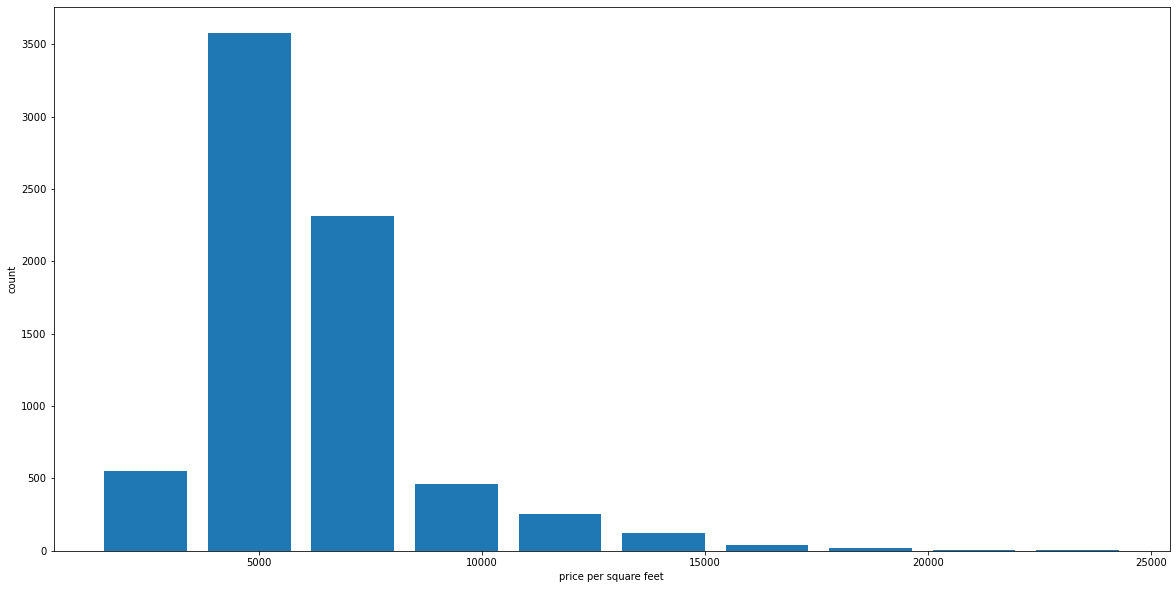

In [90]:
plt.figure(figsize=(20,10))
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [91]:
 df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [92]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
5294,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8519,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8609,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9346,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9678,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

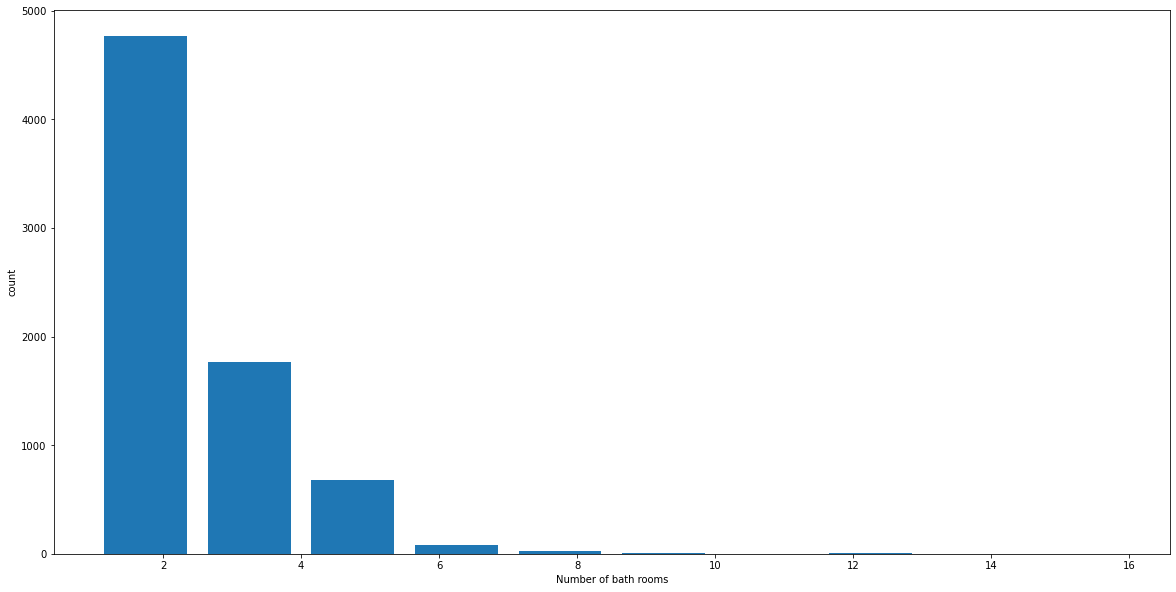

In [93]:
plt.figure(figsize=(20,10))
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('Number of bath rooms')
plt.ylabel('count')

In [94]:
df8.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price', 'BHK',
       'price_per_sqft'],
      dtype='object')

In [95]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1629,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5255,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6734,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8443,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [96]:
#removing the above four data points
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7263, 8)

In [97]:
df9.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [98]:
df9.balcony.value_counts()

2.0    2991
1.0    2943
3.0     804
0.0     525
Name: balcony, dtype: int64

In [99]:
df9.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [100]:
df10=df9.drop(['price_per_sqft','size'],axis=1)
df10.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [101]:
#df10=df10.drop('balcony',axis=1)

In [102]:
df10.shape

(7263, 6)

In [103]:
dummies=pd.get_dummies(df10.location)
dummies.head(3)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df11= pd.concat([df10,dummies.drop('other',axis=1)],axis= 1)
df11.shape

(7263, 247)

In [105]:
df11.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df12=df11.drop('location',axis=1)
df12.head(5)

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df12.describe()

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
count,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,...,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000
mean,1471.168170,2.414016,1.560925,96.712414,2.485199,0.000964,0.002203,0.001101,0.000551,0.000826,...,0.003993,0.000551,0.000551,0.004268,0.033320,0.001515,0.011841,0.003304,0.001101,0.005094
std,815.067913,0.939659,0.782520,87.700194,0.912757,0.031032,0.046887,0.033172,0.023463,0.028732,...,0.063067,0.023463,0.023463,0.065196,0.179482,0.038890,0.108177,0.057393,0.033172,0.071197
min,300.000000,1.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1092.000000,2.000000,1.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1255.000000,2.000000,2.000000,73.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1654.000000,3.000000,2.000000,110.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,16.000000,3.000000,2200.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y=df12.price

In [110]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [112]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(Xtrain,ytrain)
lr_clf.score(Xtest,ytest)

0.8774483633118837

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84406015, 0.82871192, 0.86593809, 0.88636116, 0.87299924,
       0.85262952, 0.77040129, 0.87702813, 0.85072392, 0.85814397])

In [114]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [115]:
def find_best_model_using_gridsearchcv(X,y):
    algos ={
        'linear_ regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decidion_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedam_mse'],
                'splitter':['best','random']
            }
        },
        
    } 
    scores =[]
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return  pd.DataFrame(scores,columns=['model','best_score','best_params']) 

In [116]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklear

,model,best_score,best_params
0,linear_ regression,0.859614,{'normalize': True}
1,lasso,0.700607,"{'alpha': 1, 'selection': 'cyclic'}"
2,decidion_tree,0.742206,"{'criterion': 'mse', 'splitter': 'best'}"


In [117]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [118]:
np.where(X.columns=='2nd Phase Judicial Layout')

(array([6], dtype=int64),)

In [119]:
np.where(X.columns=='2nd Phase Judicial Layout')[0]

array([6], dtype=int64)

In [120]:
# this is used to find the location of the index
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [121]:
#testing the model by giving new values

def predict_price(location,sqft,bath,balcony,BHK):
    loc_index= np.where(X.columns==location)[0][0]
                        
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = BHK
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]*100000

In [122]:
predict_price('1st Block Jayanagar',1600,2,2,2)

C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25169453.17848441

In [123]:
predict_price('Indira Nagar',1600,6,4,5) 

C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23814280.64946708

In [124]:
predict_price('Indira Nagar',1600,3,3,3) 

C:\Users\VISHIST NM\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23722592.682885535

In [128]:
import pickle
with open ('bengaluru_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [129]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open ('columns.json','w') as f:
    f.write(json.dumps(columns))